
<img align="right" src="tf-small.png"/>
# Programming theologians

[Text-Fabric](https://github.com/ETCBC/text-fabric): Ancient texts as fabrics of source and annotations.

[data model](https://github.com/ETCBC/text-fabric/wiki/Data-model): Text objects, relationships, features.

Got it? Get it! 

[home page](https://github.com/ETCBC/text-fabric/wiki)

Join the computing gang

1. go to [https://shebanq.jove.surfsara.nl](https://shebanq.jove.surfsara.nl) and log in (see paper ticket)
1. select assignment `prog_theo`, fetch `leipzig` and click it
1. click `Programming theologians.ipynb` and off-you-go

![shot](jove.png)

# Before the beginning

In [1]:
import collections

from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

import pandas
pandas.set_option('display.notebook_repr_html', True)

## API to the Hebrew Text

In [2]:
from tf.fabric import Fabric

ETCBC = 'hebrew/etcbc4c'
PHONO = 'hebrew/phono'

TF_H = Fabric( modules=[ETCBC, PHONO], silent=False )

This is Text-Fabric 2.3.7
Api reference : https://github.com/ETCBC/text-fabric/wiki/Api
Tutorial      : https://github.com/ETCBC/text-fabric/blob/master/docs/tutorial.ipynb
Data sources  : https://github.com/ETCBC/text-fabric-data
Data docs     : https://etcbc.github.io/text-fabric-data
Shebanq docs  : https://shebanq.ancient-data.org/text
Slack team    : https://shebanq.slack.com/signup
Questions? Ask shebanq@ancient-data.org for an invite to Slack
111 features found and 0 ignored


In [3]:
apiH = TF_H.load('sp')

  0.00s loading features ...
   |     0.17s B sp                   from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
   |     0.00s Feature overview: 104 for nodes; 5 for edges; 2 configs; 7 computed
  5.76s All features loaded/computed - for details use loadLog()


## API to the Greek Text

In [4]:
TF_G = Fabric(modules='greek/sblgnt')

This is Text-Fabric 2.3.7
Api reference : https://github.com/ETCBC/text-fabric/wiki/Api
Tutorial      : https://github.com/ETCBC/text-fabric/blob/master/docs/tutorial.ipynb
Data sources  : https://github.com/ETCBC/text-fabric-data
Data docs     : https://etcbc.github.io/text-fabric-data
Shebanq docs  : https://shebanq.ancient-data.org/text
Slack team    : https://shebanq.slack.com/signup
Questions? Ask shebanq@ancient-data.org for an invite to Slack
63 features found and 0 ignored


In [5]:
apiG = TF_G.load('psp')

  0.00s loading features ...
   |     0.05s B psp                  from /Users/dirk/github/text-fabric-data/greek/sblgnt
   |     0.00s Feature overview: 60 for nodes; 2 for edges; 1 configs; 7 computed
  1.73s All features loaded/computed - for details use loadLog()


## Easy switching

In [6]:
def doGreek():
    global T
    global L
    global F
    global Fs
    T = apiG.T
    L = apiG.L
    F = apiG.F
    Fs = apiG.Fs

def doHebrew():
    global T
    global L
    global F
    global Fs
    T = apiH.T
    L = apiH.L
    F = apiH.F
    Fs = apiH.Fs

def doingHebrew(): return F is apiH.F

def doingGreek(): return F is apiG.F

# In the beginning

The first verse

## In Hebrew

In [7]:
doHebrew()

In [8]:
T.text(range(1,12))

'בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖יִם וְאֵ֥ת הָאָֽרֶץ׃ '

In [9]:
T.text(range(1,12), fmt='text-phono-full')

'bᵊrēšˌîṯ bārˈā ʔᵉlōhˈîm ʔˌēṯ haššāmˌayim wᵊʔˌēṯ hāʔˈāreṣ . '

In [10]:
T.formats

{'lex-orig-full',
 'lex-orig-plain',
 'lex-trans-full',
 'lex-trans-plain',
 'text-orig-full',
 'text-orig-full-ketiv',
 'text-orig-plain',
 'text-phono-full',
 'text-trans-full',
 'text-trans-full-ketiv',
 'text-trans-plain'}

In [11]:
T.text(range(1,12), fmt='lex-orig-plain')

'ב ראשׁית ברא אלהימ את ה שׁמימ ו את ה ארצ '

## In Greek

In [12]:
doGreek()

In [13]:
firstVerse = T.nodeFromSection(('Matthew', 1, 1))
F.otype.v(firstVerse)

'verse'

In [14]:
words = L.d(firstVerse, otype='word')
words

[1, 2, 3, 4, 5, 6, 7, 8]

In [15]:
T.text(words)

'Βίβλος γενέσεως Ἰησοῦ χριστοῦ υἱοῦ Δαυὶδ υἱοῦ Ἀβραάμ. '

In [16]:
T.formats

{'lex-orig-full', 'text-orig-full', 'text-orig-plain'}

In [17]:
T.text(words, fmt='text-orig-plain')

'ΒΙΒΛΟΣ ΓΕΝΕΣΕΩΣ ΙΗΣΟΥ ΧΡΙΣΤΟΥ ΥΙΟΥ ΔΑΥΙΔ ΥΙΟΥ ΑΒΡΑΑΜ. '

In [18]:
T.text(words, fmt='lex-orig-full')

'βίβλος γένεσις Ἰησοῦς Χριστός υἱός Δαυίδ υἱός Ἀβραάμ '

# Man and woman
God created the genders, we count them.

### Which genders have we?

In [19]:
doHebrew()

TF_H.load('gn', add=True)

  0.00s loading features ...
   |     0.21s B gn                   from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
  0.22s All additional features loaded - for details use loadLog()


In [20]:
{F.gn.v(w) for w in F.otype.s('word')}

{'NA', 'f', 'm', 'unknown'}

### Genders in Hebrew and Greek

In [21]:
doGreek()
TF_G.load('Gender', add=True)

  0.00s loading features ...
   |     0.06s B Gender               from /Users/dirk/github/text-fabric-data/greek/sblgnt
  0.07s All additional features loaded - for details use loadLog()


In [22]:
def getGenders():
    featureName = 'gn' if doingHebrew() else 'Gender'
    return {Fs(featureName).v(w) for w in F.otype.s('word')}

In [23]:
doGreek()
print('Greek: {}'.format(getGenders()))
doHebrew()
print('Hebrew: {}'.format(getGenders()))

Greek: {None, 'Neuter', 'Feminine', 'Masculine'}
Hebrew: {'NA', 'm', 'f', 'unknown'}


### Counting genders

In [24]:
def countGenders():
    featureName = 'gn' if doingHebrew() else 'Gender'
    stats = collections.Counter()
    for w in F.otype.s('word'):
        stats[Fs(featureName).v(w)] += 1
    print(stats)
countGenders()

Counter({'NA': 180152, 'm': 164191, 'unknown': 45524, 'f': 36714})


## ... in graphic detail ...

In [25]:
def genderBias(book):
    bookNode = T.nodeFromSection((book,))
    chapterNodes = L.d(bookNode, otype='chapter')
    x = [T.sectionFromNode(c)[1] for c in chapterNodes]
    masc = dict((c, 0) for c in x)
    fem = dict((c, 0) for c in x)
    neut = dict((c, 0) for c in x)
    absent = dict((c, 0) for c in x)
    total = dict((c, 0) for c in x)

    genderFeature = 'gn' if doingHebrew() else 'Gender'

    for chapterNode in chapterNodes:
        chapter = T.sectionFromNode(chapterNode)[1]
        words = L.d(chapterNode, otype='word')
        for w in words:
            total[chapter] += 1
            gender = Fs(genderFeature).v(w)
            if gender in {'m', 'Masculine'}: masc[chapter] += 1
            if gender in {'f', 'Feminine'}: fem[chapter] += 1
            if gender in {'Neuter'}: neut[chapter] += 1
            if gender in {'NA', 'unknown', None}: absent[chapter] += 1
    m = [100 * masc[c] / total[c] for c in x]
    f = [100 * fem[c] / total[c] for c in x]
    n = [100 * neut[c] / total[c] for c in x]
    a = [100 * absent[c] / total[c] for c in x]

    fig = plt.figure()
    plt.plot(x, m, 'b-', x, f, 'r-', x, n, 'g-', x, a, '0.5')
    plt.axis([x[0], x[-1], 0, 70])
    plt.xticks(x, x, rotation='vertical')
    plt.margins(0.2)
    plt.subplots_adjust(bottom=0.15);
    plt.title('gender in {} {}-{}'.format(book, x[0], x[-1]))

In [26]:
print(', '.join(T.sectionFromNode(b)[0] for b in F.otype.s('book')))

Genesis, Exodus, Leviticus, Numbers, Deuteronomy, Joshua, Judges, 1_Samuel, 2_Samuel, 1_Kings, 2_Kings, Isaiah, Jeremiah, Ezekiel, Hosea, Joel, Amos, Obadiah, Jonah, Micah, Nahum, Habakkuk, Zephaniah, Haggai, Zechariah, Malachi, Psalms, Job, Proverbs, Ruth, Song_of_songs, Ecclesiastes, Lamentations, Esther, Daniel, Ezra, Nehemiah, 1_Chronicles, 2_Chronicles


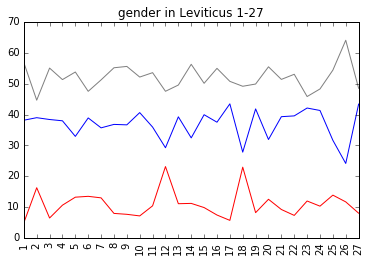

In [27]:
genderBias('Leviticus')

## Inspect some peaks and dips

In [28]:
TF_H.load('gloss', add=True)

  0.00s loading features ...
   |     0.04s B gloss                from /Users/dirk/github/text-fabric-data/hebrew/etcbc4c
  0.04s All additional features loaded - for details use loadLog()


In [29]:
def atAGlance(book, chapter):
    words = L.d(T.nodeFromSection((book, chapter)), otype='word')
    freqs = collections.Counter()
    for w in words:
        if doingHebrew():
            lexeme = L.u(w, otype='lex')[0]
            freqs[F.gloss.v(lexeme)] += 1
        else:
            freqs[F.UnicodeLemma.v(w)] += 1
    for (gloss, freq) in sorted(freqs.items(), key=lambda x: (-x[1], x[0])):
        print('{:>3} {}'.format(freq, gloss))

In [30]:
def inDepth(book, chapter):
    chapterNode = T.nodeFromSection((book, chapter))
    verseNodes = L.d(chapterNode, otype='verse')
    for verseNode in verseNodes:
        words = L.d(verseNode, otype='word')
        print('{}: {}'.format(T.sectionFromNode(verseNode)[2], T.text(words)))  

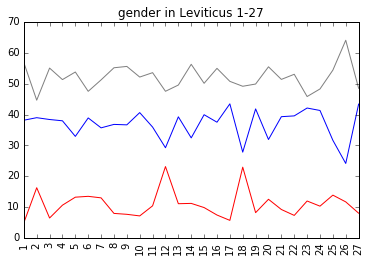

In [31]:
genderBias('Leviticus')

In [32]:
atAGlance('Leviticus', 18)

 31 and
 31 not
 26 to
 24 nakedness
 21 the
 18 <object marker>
 17 uncover
 14 in
 11 woman
 10 daughter
 10 make
 10 she
  9 <relative>
  9 father
  8 be unclean
  8 i
  8 whole
  7 YHWH
  7 earth
  6 abomination
  6 from
  5 face
  5 mother
  5 regulation
  5 sister
  5 that
  5 these
  4 god(s)
  4 keep
  4 son
  3 approach
  3 as
  3 body
  3 brother
  3 give
  3 justice
  3 man
  3 offspring
  3 or
  3 people
  3 vomit
  2 cattle
  2 copulation
  2 deed
  2 lie down
  2 say
  2 seed
  2 sit
  2 speak
  2 take
  2 they
  2 upon
  2 walk
  1 <uncertain>
  1 Canaan
  1 Egypt
  1 Israel
  1 Moloch
  1 Moses
  1 be alive
  1 be hostile
  1 bride
  1 come
  1 couch
  1 cut
  1 defile
  1 dwell
  1 failure
  1 father's sister
  1 fellow
  1 flesh
  1 guard-post
  1 he
  1 house
  1 human, mankind
  1 interior
  1 life
  1 loose conduct
  1 male
  1 menstruation
  1 midst
  1 miss
  1 name
  1 native
  1 outside
  1 pass
  1 send
  1 sin
  1 sojourner
  1 soul
  1 stand
  1 there
  1 un

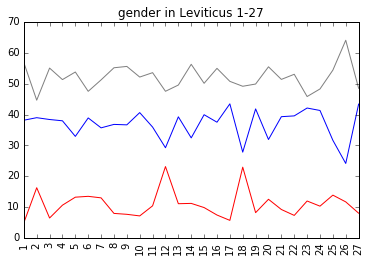

In [33]:
genderBias('Leviticus')

In [34]:
atAGlance('Leviticus', 26)

132 and
 54 <object marker>
 49 in
 40 to
 32 the
 23 earth
 19 not
 14 give
 13 be hostile
 11 even
 11 i
 10 from
 10 sin
 10 upon
 10 walk
  8 be
  8 covenant
  8 if
  7 be desolate
  7 dagger
  7 eat
  7 face
  7 opposition
  7 pursue
  7 with
  6 <relative>
  6 YHWH
  5 abhor
  5 break
  5 god(s)
  5 make
  5 pay off
  5 sabbath
  5 soul
  4 <NEG>
  4 as
  4 bread
  4 cease
  4 hear
  4 people
  4 remember
  4 seven
  4 then
  4 these
  4 whole
  3 admonish
  3 be complete
  3 come
  3 commandment
  3 fall
  3 go out
  3 justice
  3 midst
  3 regulation
  3 retract
  3 sit
  3 this
  3 together with
  3 town
  2 Egypt
  2 add
  2 arise
  2 corpse
  2 cut
  2 day
  2 emptiness
  2 eye
  2 father
  2 flee
  2 flesh
  2 fruit
  2 hand
  2 heart
  2 hundred
  2 interval
  2 keep
  2 motive
  2 old
  2 open field
  2 overtake
  2 produce
  2 putrefy
  2 remain
  2 ruin
  2 sanctuary
  2 scatter
  2 seed
  2 send
  2 son
  2 that
  2 tree
  2 vintage
  2 wild animal
  2 you
  1 Abraham


In [35]:
inDepth('Leviticus', 26)

1: לֹֽא־תַעֲשׂ֨וּ לָכֶ֜ם אֱלִילִ֗ם וּפֶ֤סֶל וּמַצֵּבָה֙ לֹֽא־תָקִ֣ימוּ לָכֶ֔ם וְאֶ֣בֶן מַשְׂכִּ֗ית לֹ֤א תִתְּנוּ֙ בְּאַרְצְכֶ֔ם לְהִֽשְׁתַּחֲוֹ֖ת עָלֶ֑יהָ כִּ֛י אֲנִ֥י יְהוָ֖ה אֱלֹהֵיכֶֽם׃ 
2: אֶת־שַׁבְּתֹתַ֣י תִּשְׁמֹ֔רוּ וּמִקְדָּשִׁ֖י תִּירָ֑אוּ אֲנִ֖י יְהוָֽה׃ ס 
3: אִם־בְּחֻקֹּתַ֖י תֵּלֵ֑כוּ וְאֶת־מִצְוֹתַ֣י תִּשְׁמְר֔וּ וַעֲשִׂיתֶ֖ם אֹתָֽם׃ 
4: וְנָתַתִּ֥י גִשְׁמֵיכֶ֖ם בְּעִתָּ֑ם וְנָתְנָ֤ה הָאָ֨רֶץ֙ יְבוּלָ֔הּ וְעֵ֥ץ הַשָּׂדֶ֖ה יִתֵּ֥ן פִּרְיֹֽו׃ 
5: וְהִשִּׂ֨יג לָכֶ֥ם דַּ֨יִשׁ֙ אֶת־בָּצִ֔יר וּבָצִ֖יר יַשִּׂ֣יג אֶת־זָ֑רַע וַאֲכַלְתֶּ֤ם לַחְמְכֶם֙ לָשֹׂ֔בַע וִֽישַׁבְתֶּ֥ם לָבֶ֖טַח בְּאַרְצְכֶֽם׃ 
6: וְנָתַתִּ֤י שָׁלֹום֙ בָּאָ֔רֶץ וּשְׁכַבְתֶּ֖ם וְאֵ֣ין מַחֲרִ֑יד וְהִשְׁבַּתִּ֞י חַיָּ֤ה רָעָה֙ מִן־הָאָ֔רֶץ וְחֶ֖רֶב לֹא־תַעֲבֹ֥ר בְּאַרְצְכֶֽם׃ 
7: וּרְדַפְתֶּ֖ם אֶת־אֹיְבֵיכֶ֑ם וְנָפְל֥וּ לִפְנֵיכֶ֖ם לֶחָֽרֶב׃ 
8: וְרָדְפוּ֙ מִכֶּ֤ם חֲמִשָּׁה֙ מֵאָ֔ה וּמֵאָ֥ה מִכֶּ֖ם רְבָבָ֣ה יִרְדֹּ֑פוּ וְנָפְל֧וּ אֹיְבֵיכֶ֛ם לִפְנֵיכֶ֖ם לֶחָֽרֶב׃ 
9: וּפָנִ֣יתִי אֲלֵיכֶ֔ם וְהִפְרֵיתִ֣י אֶתְכֶ֔ם וְ

## Man, woman and thing

In [36]:
doGreek()

TF_G.load('UnicodeLemma', add=True)

  0.00s loading features ...
  0.00s All additional features loaded - for details use loadLog()


### The Greek genders

In [37]:
getGenders()

{None, 'Neuter', 'Feminine', 'Masculine'}

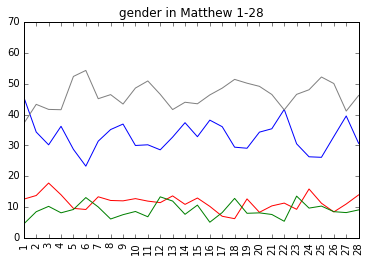

In [38]:
genderBias('Matthew')

In [39]:
atAGlance('Matthew', 24)

139 ὁ
 57 καί
 23 αὐτός
 16 εἰμί
 16 ἐν
 15 δέ
 15 οὐ
 14 μή
 13 σύ
 12 λέγω
 11 ἐπί
 10 ἡμέρα
  9 οὗτος
  9 πᾶς
  9 τότε
  9 ἐκεῖνος
  8 γάρ
  7 γίνομαι
  7 οὐρανός
  7 πολύς
  7 υἱός
  7 ἔρχομαι
  7 ὅς
  7 ὅτι
  6 ἀπό
  6 ἄνθρωπος
  6 ἐγώ
  5 γινώσκω
  5 διά
  5 κύριος
  5 μετά
  5 οὕτω(ς)
  5 ἕως
  4 δοῦλος
  4 εἰ
  4 εἰς
  4 εἷς
  4 παρουσία
  4 πλανάω
  4 ἄν
  4 ἐάν
  4 ἔθνος
  4 ἰδού
  4 ὁράω
  3 αἴρω
  3 βασιλεία
  3 δίδωμι
  3 θλῖψις
  3 μέγας
  3 οἶδα
  3 οὐδέ
  3 οὖν
  3 παρέρχομαι
  3 σημεῖον
  3 τέλος
  3 ἀμήν
  3 ἀφίημι
  3 ἐγείρω
  3 ἐκλεκτός
  3 ἐξέρχομαι
  3 ὅταν
  3 ὥρα
  3 ὧδε
  2 Νῶε
  2 Χριστός
  2 βλέπω
  2 γρηγορέω
  2 γῆ
  2 δύναμις
  2 δύο
  2 καθίστημι
  2 κατά
  2 κατακλυσμός
  2 κολοβόω
  2 λίθος
  2 μαθητής
  2 μισέω
  2 οἰκία
  2 πίνω
  2 παραδίδωμι
  2 παραλαμβάνω
  2 πιστεύω
  2 ποῖος
  2 προσέρχομαι
  2 πόλεμος
  2 σῴζω
  2 τίς
  2 τις
  2 τόπος
  2 φαίνω
  2 ψευδοπροφήτης
  2 ἀγρός
  2 ἀλλήλων
  2 ἀποκρίνομαι
  2 ἀρχή
  2 ἄγγελος
  2 ἄκρον
  2 ἐγγύς
  2

In [40]:
inDepth('Matthew', 24)

1: Καὶ ὁ Ἰησοῦς ἐξελθὼν ἀπὸ τοῦ ἱεροῦ ἐπορεύετο, καὶ προσῆλθον οἱ μαθηταὶ αὐτοῦ ἐπιδεῖξαι αὐτῷ τὰς οἰκοδομὰς τοῦ ἱεροῦ· 
2: δὲ ὁ ἀποκριθεὶς εἶπεν αὐτοῖς· Οὐ βλέπετε ταῦτα πάντα; ἀμὴν λέγω ὑμῖν, οὐ μὴ ἀφεθῇ ὧδε ἐπὶ λίθον λίθος ὃς οὐ καταλυθήσεται. 
3: δὲ Καθημένου αὐτοῦ ἐπὶ τοῦ Ὄρους τῶν Ἐλαιῶν προσῆλθον αὐτῷ οἱ μαθηταὶ κατ’ ἰδίαν λέγοντες· Εἰπὸν ἡμῖν πότε ταῦτα ἔσται, καὶ τί τὸ σημεῖον τῆς σῆς παρουσίας καὶ συντελείας τοῦ αἰῶνος. 
4: καὶ ἀποκριθεὶς ὁ Ἰησοῦς εἶπεν αὐτοῖς· Βλέπετε μή τις ὑμᾶς πλανήσῃ· 
5: γὰρ πολλοὶ ἐλεύσονται ἐπὶ τῷ ὀνόματί μου λέγοντες· Ἐγώ εἰμι ὁ χριστός, καὶ πολλοὺς πλανήσουσιν. 
6: δὲ μελλήσετε ἀκούειν πολέμους καὶ ἀκοὰς πολέμων· ὁρᾶτε, μὴ θροεῖσθε· γὰρ δεῖ γενέσθαι, ἀλλ’ οὔπω ἐστὶν τὸ τέλος. 
7: γὰρ ἐγερθήσεται ἔθνος ἐπὶ ἔθνος καὶ βασιλεία ἐπὶ βασιλείαν, καὶ ἔσονται λιμοὶ καὶ σεισμοὶ κατὰ τόπους· 
8: δὲ πάντα ταῦτα ἀρχὴ ὠδίνων. 
9: Τότε παραδώσουσιν ὑμᾶς εἰς θλῖψιν καὶ ἀποκτενοῦσιν ὑμᾶς, καὶ ἔσεσθε μισούμενοι ὑπὸ πάντων τῶν ἐθνῶν διὰ τὸ ὄνομά μου. 
10: καὶ τότε σκα

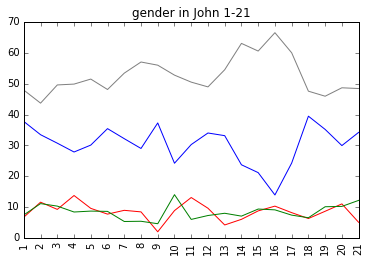

In [41]:
genderBias('John')

In [42]:
atAGlance('John', 16)

 52 ὁ
 40 σύ
 34 καί
 26 ἐγώ
 21 ὅτι
 16 λέγω
 14 οὐ
 13 οὗτος
 12 ἐν
 11 πατήρ
 11 ἔρχομαι
 10 αὐτός
 10 λαλέω
  9 δέ
  9 περί
  9 ἀλλά
  8 κόσμος
  8 ἵνα
  7 εἰμί
  7 μικρός
  7 πρός
  7 ἔχω
  6 ἐκ
  5 εἰς
  5 οὐδείς
  5 πάλιν
  5 ἐκεῖνος
  5 ἐρωτάω
  5 ὥρα
  4 αἰτέω
  4 θεωρέω
  4 λύπη
  4 νῦν
  4 οὐκέτι
  4 πιστεύω
  4 πᾶς
  4 χαρά
  4 ἀμήν
  4 ὁράω
  4 ὅταν
  4 ὑπάγω
  3 γάρ
  3 θεός
  3 λαμβάνω
  3 μή
  3 μετά
  3 οἶδα
  3 οὖν
  3 παροιμία
  3 τίς
  3 ἀλήθεια
  3 ἀναγγέλλω
  3 ἀπό
  3 ἄρτι
  3 ἐμός
  3 ἐξέρχομαι
  3 ὄνομα
  2 γεννάω
  2 γινώσκω
  2 διά
  2 δικαιοσύνη
  2 θλῖψις
  2 καρδία
  2 κρίσις
  2 μέν
  2 μαθητής
  2 μνημονεύω
  2 μόνος
  2 πέμπω
  2 παρρησία
  2 πληρόω
  2 ποιέω
  2 πορεύομαι
  2 τις
  2 φιλέω
  2 χαίρω
  2 ἀλλήλων
  2 ἀπέρχομαι
  2 ἀφίημι
  2 ἁμαρτία
  2 ἐάν
  2 ἡμέρα
  2 Ἰησοῦς
  2 ὅς
  2 ὅσος
  1 αἴρω
  1 βαστάζω
  1 γίνομαι
  1 γυνή
  1 δίδωμι
  1 δοκέω
  1 δοξάζω
  1 δύναμαι
  1 εἰρήνη
  1 ζητέω
  1 θέλω
  1 θαρρέω
  1 θρηνέω
  1 κλαίω
  1 κρίνω
  1 κ

# Six days of work (creating data)

Semantic plurals in the letter of Jude.

Let's get all nominal phrases.

In [43]:
doGreek()
TF_G.load('Cat', add=True)

  0.00s loading features ...
   |     0.18s B Cat                  from /Users/dirk/github/text-fabric-data/greek/sblgnt
  0.19s All additional features loaded - for details use loadLog()


In [44]:
bookNode = T.nodeFromSection(('Jude',))
phraseNodes = L.d(bookNode, otype='phrase')
NPs = [p for p in phraseNodes if F.Cat.v(p) == 'np']

print('{} NPs in Jude'.format(len(NPs)))

357 NPs in Jude


### Generate a data entry form

Export this data as CSV 
so that experts can fill in a new feature: *semantically plural*.

In [45]:
enrichFile = 'np.csv'
enrichedFile = 'np-enriched.csv'

with open(enrichFile, 'w') as f:
    fieldNames = ['passage', 'node', 'phrase', 'semantic plural', 'sentence']
    f.write('{}\n'.format('\t'.join(fieldNames)))
    for np in NPs:
        sn = L.u(np, otype='sentence')[0]
        sentence = L.d(sn, otype='word')
        phrase = L.d(np, otype='word')
        fields = [
            '{} {}:{}'.format(*T.sectionFromNode(np)),
            str(np),
            T.text(phrase),
            '',
            T.text(sentence),
        ]
        f.write('{}\n'.format('\t'.join(fields)))

In [46]:
dataFrame = pandas.read_csv(enrichFile, sep='\t')
dataFrame.head(100)

,passage,node,phrase,semantic plural,sentence
0,Jude 1:1,400492,"Ἰούδας Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβου,",NaN,"Ἰούδας Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβο..."
1,Jude 1:1,400493,Ἰούδας,NaN,"Ἰούδας Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβο..."
2,Jude 1:1,400494,"Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβου,",NaN,"Ἰούδας Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβο..."
3,Jude 1:1,400495,"Ἰησοῦ Χριστοῦ δοῦλος,",NaN,"Ἰούδας Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβο..."
4,Jude 1:1,400496,Ἰησοῦ Χριστοῦ,NaN,"Ἰούδας Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβο..."
5,Jude 1:1,400497,Ἰησοῦ,NaN,"Ἰούδας Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβο..."
6,Jude 1:1,400498,Χριστοῦ,NaN,"Ἰούδας Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβο..."
7,Jude 1:1,400499,"δοῦλος,",NaN,"Ἰούδας Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβο..."
8,Jude 1:1,400500,"ἀδελφὸς Ἰακώβου,",NaN,"Ἰούδας Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβο..."
9,Jude 1:1,400501,ἀδελφὸς,NaN,"Ἰούδας Ἰησοῦ Χριστοῦ δοῦλος, δὲ ἀδελφὸς Ἰακώβο..."


### Read the data enrichments

In [47]:
semNumber = dict()

with open(enrichedFile) as f:
    for (i, line) in enumerate(f):
        if i == 0: continue                    # header row

        fields = line.rstrip('\n').split(';')
        value = fields[3]
        if value == '': continue               # no data entered

        node = int(fields[1])
        semNumber[node] = value

In [48]:
for p in sorted(semNumber):
    print('{} => {}'.format(p, semNumber[p]))

400518 => p
400523 => p
400536 => p
400538 => s
400544 => s
400549 => p
400553 => p
400578 => s
400579 => s
400595 => p


### Save the new feature as a text-fabric file

In [49]:
metaData = dict(
    semNumber=dict(
        valueType='str',
        source='Semantic plurality training set',
        author='J.S. Bach, Leipzig',
    ),
)
TF_G = Fabric(locations='.', modules='semantic')

This is Text-Fabric 2.3.7
Api reference : https://github.com/ETCBC/text-fabric/wiki/Api
Tutorial      : https://github.com/ETCBC/text-fabric/blob/master/docs/tutorial.ipynb
Data sources  : https://github.com/ETCBC/text-fabric-data
Data docs     : https://etcbc.github.io/text-fabric-data
Shebanq docs  : https://shebanq.ancient-data.org/text
Slack team    : https://shebanq.slack.com/signup
Questions? Ask shebanq@ancient-data.org for an invite to Slack
1 features found and 0 ignored


  0.00s Grid feature "otype" not found in
/Users/dirk/github/text-fabric/presentations/Leipzig2017-07-06/semantic
  0.00s Grid feature "oslots" not found in
/Users/dirk/github/text-fabric/presentations/Leipzig2017-07-06/semantic


  0.01s Grid feature "otext" not found. Working without Text-API



In [50]:
TF_G.save(
    nodeFeatures=dict(semNumber=semNumber),
    metaData=metaData,
)

  0.00s Exporting 1 node and 0 edge and 0 config features to /Users/dirk/github/text-fabric/presentations/Leipzig2017-07-06/semantic:
   |     0.00s T semNumber            to /Users/dirk/github/text-fabric/presentations/Leipzig2017-07-06/semantic
  0.01s Exported 1 node features and 0 edge features and 0 config features to /Users/dirk/github/text-fabric/presentations/Leipzig2017-07-06/semantic


### Check

In [51]:
!cat semantic/semNumber.tf

@node
@author=J.S. Bach, Leipzig
@source=Semantic plurality training set
@valueType=str
@writtenBy=Text-Fabric
@dateWritten=2017-07-19T12:19:42Z

400518	p
400523	p
400536	p
400538	s
400544	s
400549	p
400553	p
400578	s
s
400595	p


## Use the new feature

In [52]:
LOCATIONS = [
    '~/Downloads/text-fabric-data',
    '~/text-fabric-data',
    '~/github/text-fabric-data',
    '/mnt/shared/text-fabric-data',
]

TF_G = Fabric(
    locations=LOCATIONS+['.'], 
    modules=['greek/sblgnt', 'semantic'],
)

This is Text-Fabric 2.3.7
Api reference : https://github.com/ETCBC/text-fabric/wiki/Api
Tutorial      : https://github.com/ETCBC/text-fabric/blob/master/docs/tutorial.ipynb
Data sources  : https://github.com/ETCBC/text-fabric-data
Data docs     : https://etcbc.github.io/text-fabric-data
Shebanq docs  : https://shebanq.ancient-data.org/text
Slack team    : https://shebanq.slack.com/signup
Questions? Ask shebanq@ancient-data.org for an invite to Slack
64 features found and 0 ignored


In [53]:
apiG = TF_G.load('Number semNumber')
doGreek()

  0.00s loading features ...
   |     0.04s B Number               from /Users/dirk/github/text-fabric-data/greek/sblgnt
   |     0.01s T semNumber            from /Users/dirk/github/text-fabric/presentations/Leipzig2017-07-06/semantic
   |     0.00s Feature overview: 61 for nodes; 2 for edges; 1 configs; 7 computed
  1.40s All features loaded/computed - for details use loadLog()


### Observe it in action

In [54]:
for np in NPs:
    semNumber = F.semNumber.v(np)
    if not semNumber: continue
    words = L.d(np, otype='word')
    print('NP {}: semantically "{}", words marked as {}'.format(
        np,
        semNumber,
        ' '.join(F.Number.v(w) for w in words if F.Number.v(w)),
    ))

NP 400518: semantically "p", words marked as Singular Singular Singular
NP 400523: semantically "p", words marked as Plural
NP 400536: semantically "p", words marked as Plural
NP 400538: semantically "s", words marked as Singular
NP 400544: semantically "s", words marked as Singular Singular Plural Plural Singular
NP 400549: semantically "p", words marked as Plural Plural
NP 400553: semantically "p", words marked as Plural Plural Plural Plural Singular Singular Singular Plural
NP 400578: semantically "s", words marked as Singular Singular Singular Singular Plural Singular Singular
NP 400579: semantically "s", words marked as Singular Singular Singular Plural Singular Singular
NP 400595: semantically "p", words marked as Plural


# Sabbath
Have a look at the (un)finished work and see whether it is good.

## Janet Dyk

Verbal valence flowchart.

![val](valency.png)

## Martijn Naaijer

Won a grassroots price for setting up a theology course based on SHEBANQ, Jupyter, and R.
See [Python course here](https://shebanq.jove.surfsara.nl/user/dirkr/notebooks/shared/martijn/Python_Course/Introduction_to_text_fabric.ipynb).

![poster](PosterGrassroots_Naaijer.jpg)

## Christiaan Erwich

Tries to track who is who in the Psalms, and is deeply into graph visualization.
![doxo](doxology.pdf)

## Cody Kingham

Helped to convert the SBL Greek New Testament to the Text-Fabric format.
Tries to
[explain to the world](http://www.codykingham.com/etcbc/datacreation)
how the ETCBC encoded the Hebrew Bible during a 40 year long struggle with computers.

![schema](ps4.p_description.png)

## Dirk Roorda

Tries to recombine everything.

[Phonetic transcription of Hebrew](https://rawgit.com/ETCBC/text-fabric/master/phono/phonoTf.html)

![phono](phono_tests.png)

[Parallel passages](https://shebanq.ancient-data.org/shebanq/static/docs/tools/parallel/parallels.html)

See it in action on SHEBANQ:
[etcbc4b Genesis 10:1](https://shebanq.ancient-data.org/hebrew/text?qactive=hlcustom&qsel_one=grey&qpub=x&qget=x&wactive=hlcustom&wsel_one=gray&wpub=x&wget=x&nactive=hlcustom&nsel_one=black&npub=x&nget=v&chapter=10&lang=en&book=Genesis&qw=q&tr=hb&tp=txt_tb1&iid=Mnxjcm9zc3JlZg__&verse=1&version=4b&mr=m&page=1&wd4_statfl=v&ph_arela=v&wd4_statrl=v&sn_an=v&cl=v&wd1_lang=x&wd1_subpos=x&wd2_person=v&sp_rela=v&wd1_pdp=x&sn_n=v&wd3_uvf=x&ph_fun=v&wd1_nmtp=v&gl=v&sp_n=v&pt=v&ph_an=v&ph_typ=x&cl_typ=v&tt=v&wd4_statro=x&wd3_vbs=x&wd1=v&tl=x&wd3=x&wd4=v&wd2_gender=v&ph=v&wd3_vbe=v&wd1_pos=v&ph_det=v&ph_rela=x&wd4_statfo=x&tl_tlv=x&wd2_stem=v&wd2_state=v&ht=v&ph_n=v&tl_tlc=x&cl_tab=v&wd3_nme=x&hl=v&cl_par=v&cl_an=v&cl_n=v&wd3_prs=v&wd3_pfm=x&sp=v&cl_code=v&ht_hk=v&wd2=v&hl_hlc=x&cl_rela=v&wd2_gnumber=v&wd2_tense=v&cl_txt=v&wd1_n=x&sn=v&ht_ht=v&hl_hlv=v&pref=alt)

![parallel](parallel.png)

## Stand-off markup for changing sources

(it is not a nightmare)

[Versioning](https://github.com/ETCBC/text-fabric/blob/master/Versions/etcbc-versions.ipynb)

<img align="right" src="tf-small.png"/>
<p style="float: right;">google <a href="https://github.com/ETCBC/text-fabric/wiki">github text-fabric wiki</a></p>


# Thanks

###  [dirk.roorda@dans.knaw.nl](mailto:dirk.roorda@dans.knaw.nl)

[Linguistic Annotation and Philology Workshop](http://www.dh.uni-leipzig.de/wo/laphw/)
Leipzig, July 6-7, 2017

[<img align="right" src="DANS-logo.png" width="400"/>](https://dans.knaw.nl/en/front-page?set_language=en)